<a href="https://colab.research.google.com/github/farrahfox/Probability-Statistics/blob/main/Farrah_Fox_Linear_Auto_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [2]:
# importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [4]:
# importing more libraries

In [5]:
!pip install wandb
import wandb as wb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


In [6]:
# Defines a function called plot that takes a single argument

In [7]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [8]:
# defines a function to create a montage of images

In [9]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [10]:
# defining this function to get batches of data for training or testing your model

In [11]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [12]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 228218532.97it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115697892.86it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 167735233.12it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 5114235.91it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [13]:
# setting variables equal to different test/train sets

In [14]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [15]:
# obtaining the dimensions of variable 'X'

In [16]:
X.shape

(60000, 1, 28, 28)

In [17]:
# accessing the value of 'Y' in the 50000th spot

In [18]:
Y[50000]

3

In [19]:
# plots a 2D image from a 4D array

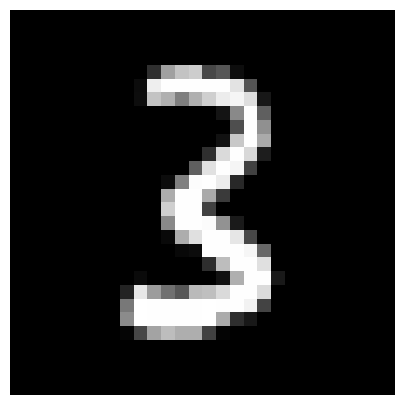

In [20]:
plot(X[50000,0,:,:])

In [21]:
Y[100]

5

In [22]:
X.shape

(60000, 1, 28, 28)

In [23]:
# selects a portion of X which consists of the first 25 elements along the first axis,
# and then selects only the element at index 0 along
# the second axis, while keeping all elements along the third and fourth axes.
# Finally, .shape returns the shape of the resulting selection

In [24]:
X[0:25,0,:,:].shape

(25, 28, 28)

In [25]:
# displays a montage plot of the subset of images selected from indices 125 to 150 along the first axis of the array

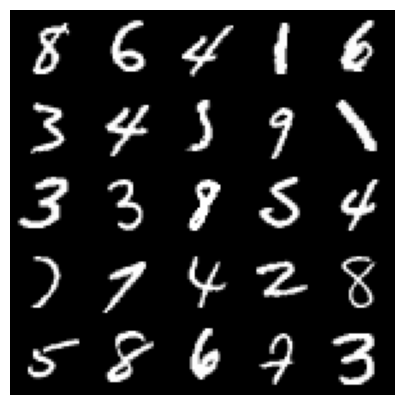

In [26]:
montage_plot(X[125:150,0,:,:])

In [27]:
X.shape[0]

60000

In [28]:
X_test.shape

(10000, 1, 28, 28)

In [29]:
# returns the number of rows in array 'X'

In [30]:
X.shape[0]

60000

In [31]:
X_test.shape[0]

10000

In [32]:
# defines a function that takes a numerical data array and returns a PyTorch tensor

In [33]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

# defines a function that converts input
# data to a PyTorch tensor, sets it to float type, disables gradient calculation, and moves it to the GPU for processing
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [34]:
# setting each variable equal to the results of the function above

In [35]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [36]:
# reshapes the arrays so that each row contains 784 elements

In [37]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [38]:
X.shape

torch.Size([60000, 784])


### Classifier


In [39]:
# loads a training batch into two separate variables

In [40]:
x,y = get_batch('train')

In [41]:
x.shape

torch.Size([1000, 784])

In [42]:
# plots the first image from your dataset represented as a 28x28 pixel image

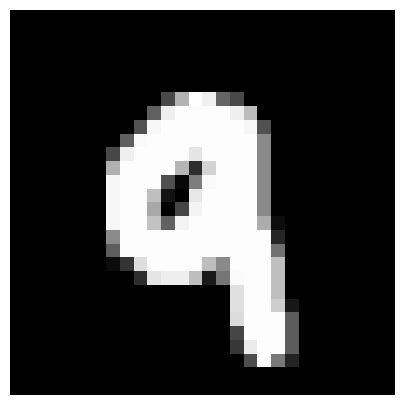

In [43]:
plot(x[0].reshape(28,28))

In [44]:
# plots the second image from your dataset represented as a 28x28 pixel image

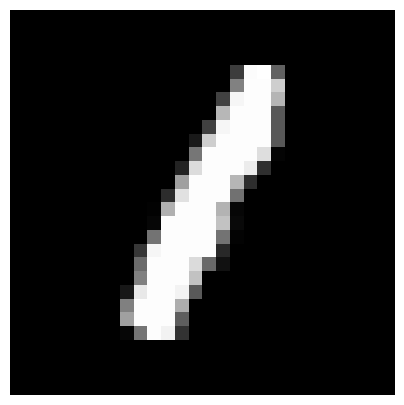

In [45]:
plot(x[1].reshape(28,28))

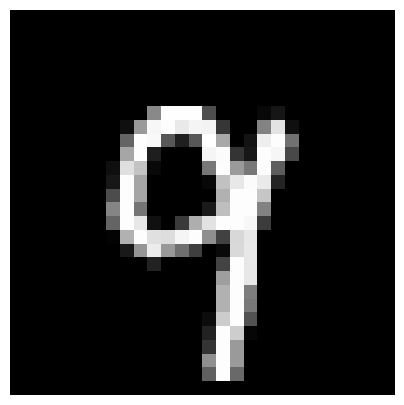

In [46]:
plot(x[2].reshape(28,28))

In [47]:
# extracts the first 10 elements from 'y'

In [48]:
y[:10]

tensor([9., 1., 9., 7., 2., 5., 3., 5., 2., 7.], device='cuda:0')

In [49]:
# initializes a weight matrix 'W' for a neural network layer with 784 input neurons and 10 output neurons,
# filled with random values from a standard normal distribution,

In [50]:
W = GPU(np.random.randn(784,10))

In [51]:
# extracts the dimensions for 'x' and 'W'

In [52]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [53]:
# matrix multiples 'x' and 'W' while simultaneously getting the dimensions of that product

In [54]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [55]:
# matrix multiples 'x' and 'W' while simultaneously getting the dimensions of that product

In [56]:
(x@W).shape

torch.Size([1000, 10])

In [57]:
# repeatedly executes the matrix multiplication operation and measures the time it takes to execute, giving you an average time

In [58]:
%%timeit
x@W

21.2 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [59]:
# matrix multiplication of 'x' and 'W'

In [60]:
x@W

tensor([[  5.8279,   9.8985,  13.7991,  ...,  14.1282, -31.8037,   3.0071],
        [ -0.5377,  10.4892,   5.7082,  ...,   2.4457, -13.0523,   5.0068],
        [ 14.1101,   5.4851,   6.9520,  ...,  -0.4388, -10.6077,   2.2774],
        ...,
        [-11.8566,  12.5028,   1.9910,  ...,   1.7546, -17.4564,   1.0331],
        [ -6.0291,  10.3066,  12.0885,  ...,  14.7740,  -6.8875,  -3.8172],
        [ -5.4776,   3.8644,  16.8636,  ...,   7.9987,  -0.3412,   0.5302]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [61]:
# makes a variable equal to the matrix multiplication of 'x' and 'W'

In [62]:
y2 = x@W

In [63]:
# generates a line plot of the first 50 elements of 'y2'

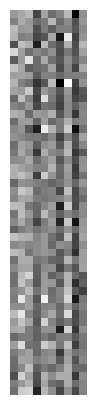

In [64]:
plot(y2[:50])

In [ ]:
# displays the variable 'y'

In [65]:
y

tensor([9., 1., 9., 7., 2., 5., 3., 5., 2., 7., 9., 3., 7., 5., 6., 0., 5., 1.,
        3., 1., 4., 3., 1., 8., 5., 4., 2., 9., 1., 4., 6., 5., 8., 1., 5., 8.,
        5., 6., 7., 8., 2., 9., 1., 0., 1., 1., 4., 2., 2., 3., 8., 4., 3., 5.,
        4., 6., 4., 7., 2., 8., 7., 9., 1., 0., 0., 1., 3., 2., 1., 3., 9., 4.,
        6., 5., 9., 6., 8., 7., 8., 8., 1., 0., 6., 1., 7., 2., 7., 3., 2., 4.,
        1., 5., 4., 6., 4., 7., 4., 8., 1., 9., 5., 6., 6., 6., 4., 3., 2., 4.,
        9., 2., 5., 8., 5., 1., 7., 0., 7., 6., 3., 4., 8., 9., 3., 7., 8., 2.,
        5., 3., 0., 3., 9., 9., 0., 3., 3., 3., 5., 9., 0., 1., 7., 5., 9., 2.,
        4., 3., 9., 1., 4., 6., 4., 7., 0., 3., 1., 7., 0., 8., 8., 4., 5., 0.,
        0., 2., 1., 4., 0., 0., 0., 7., 9., 8., 4., 0., 6., 7., 3., 0., 3., 6.,
        2., 9., 5., 3., 2., 2., 3., 4., 5., 8., 8., 6., 1., 0., 7., 5., 2., 7.,
        3., 5., 8., 1., 1., 0., 9., 8., 5., 1., 1., 6., 5., 7., 9., 2., 7., 9.,
        1., 7., 9., 9., 1., 5., 2., 6., 

In [ ]:
# obtains the dimensions of 'y'

In [66]:
y.shape

torch.Size([1000])

In [ ]:
# defines a function that takes in a tensor 'y' and converts it into an encoded tensor

In [67]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
# calls the function above

In [68]:
one_hot(y)

<ipython-input-33-1bad7f9f998f>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
# returns the indices of the maximum values along the second dimension

In [69]:
torch.argmax(y2,1)

tensor([7, 5, 0, 7, 1, 0, 2, 0, 1, 7, 2, 4, 2, 0, 7, 4, 9, 7, 7, 2, 5, 4, 9, 1,
        1, 7, 1, 7, 9, 0, 4, 0, 7, 1, 2, 1, 7, 4, 2, 1, 4, 7, 7, 1, 2, 1, 2, 1,
        2, 2, 7, 2, 1, 1, 7, 1, 0, 2, 1, 1, 2, 0, 5, 1, 1, 5, 1, 4, 2, 1, 5, 2,
        7, 1, 7, 1, 0, 7, 7, 1, 9, 1, 1, 2, 7, 4, 1, 2, 2, 7, 2, 5, 0, 1, 1, 2,
        2, 1, 2, 0, 1, 1, 4, 7, 0, 2, 7, 2, 2, 1, 1, 2, 1, 2, 7, 1, 5, 1, 2, 2,
        2, 0, 1, 7, 1, 1, 1, 1, 4, 4, 7, 0, 4, 2, 2, 1, 1, 7, 7, 2, 2, 4, 2, 4,
        5, 1, 2, 2, 0, 1, 7, 7, 4, 2, 2, 7, 7, 1, 1, 5, 1, 1, 1, 4, 2, 1, 4, 1,
        1, 2, 0, 1, 2, 1, 4, 7, 2, 1, 1, 1, 1, 1, 2, 2, 7, 4, 2, 5, 1, 1, 1, 1,
        2, 1, 7, 5, 2, 7, 5, 1, 7, 2, 9, 7, 5, 1, 1, 5, 2, 1, 1, 7, 2, 4, 7, 7,
        2, 7, 0, 9, 9, 0, 4, 7, 1, 0, 1, 1, 1, 1, 1, 2, 7, 0, 1, 1, 4, 1, 1, 7,
        1, 4, 4, 1, 1, 1, 2, 2, 1, 5, 1, 1, 1, 1, 1, 7, 4, 4, 1, 5, 7, 1, 1, 2,
        7, 7, 5, 3, 2, 7, 7, 7, 7, 7, 2, 0, 1, 4, 1, 9, 4, 1, 4, 4, 1, 2, 7, 0,
        0, 1, 0, 2, 1, 7, 1, 7, 2, 0, 0,

In [ ]:
# computes the accuracy of a classification task where 'y' is the true labels and 'y2' is the predicted labels

In [70]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0890, device='cuda:0')

In [ ]:
# obtains the dimensions of 'X'

In [71]:
X.shape

torch.Size([60000, 784])

In [ ]:
# matrix multiplication of 'X' and 'W'

In [72]:
X@W

tensor([[ -4.8267,   8.2511,  17.8106,  ...,   3.3242,  -5.3053,  -9.6090],
        [ -0.3159,   6.3191,  -3.2463,  ...,   2.3454, -24.5007,  -4.6576],
        [  9.4265,   7.5229,   2.2368,  ...,   9.3573,  -6.6069,   7.5390],
        ...,
        [  9.3654,  17.0234,   5.2071,  ...,  10.4109,  -5.3444,  -5.7732],
        [  5.4166,  16.5120,  -6.2876,  ...,   2.6456, -16.7291, -12.5314],
        [  1.5973,   6.7649,  -0.1874,  ...,   5.1909, -11.1559,   3.3458]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
# computes the indices of the maximum value along a specified axis in the matrix product of tensors 'X' and 'W'

In [73]:
torch.argmax(X@W,1)

tensor([2, 4, 5,  ..., 1, 1, 1], device='cuda:0')

In [74]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
# computes the accuracy as a fraction of correct predictions out of the total number of samples

In [75]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.1005, device='cuda:0')

In [76]:
X@W

tensor([[ -4.8267,   8.2511,  17.8106,  ...,   3.3242,  -5.3053,  -9.6090],
        [ -0.3159,   6.3191,  -3.2463,  ...,   2.3454, -24.5007,  -4.6576],
        [  9.4265,   7.5229,   2.2368,  ...,   9.3573,  -6.6069,   7.5390],
        ...,
        [  9.3654,  17.0234,   5.2071,  ...,  10.4109,  -5.3444,  -5.7732],
        [  5.4166,  16.5120,  -6.2876,  ...,   2.6456, -16.7291, -12.5314],
        [  1.5973,   6.7649,  -0.1874,  ...,   5.1909, -11.1559,   3.3458]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [77]:
W.shape

torch.Size([784, 10])

In [ ]:
# returns the shape of the first column of the matrix 'W'

In [78]:
W[:,0].shape

torch.Size([784])

In [ ]:
# plots the values of a column vector reshaped into a 28x28 grid

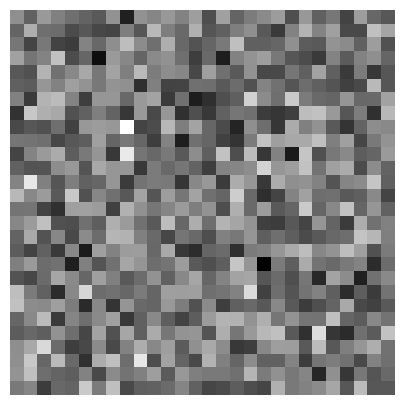

In [79]:
plot(W[:,0].reshape(28,28))

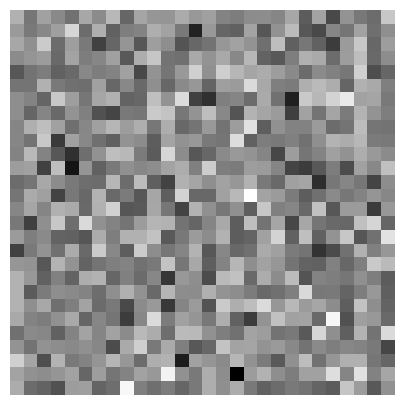

In [80]:
plot(W[:,2].reshape(28,28))

In [81]:
W.shape

torch.Size([784, 10])

In [ ]:
# returns a tuple representing the dimensions of the transposed matrix or tensor

In [82]:
(W.T).shape

torch.Size([10, 784])

In [ ]:
# taking a tensor 'W', reshaping it, converting it to a NumPy array, and then plotting
# the resulting images in a montage using the custom function 'montage_plot()'

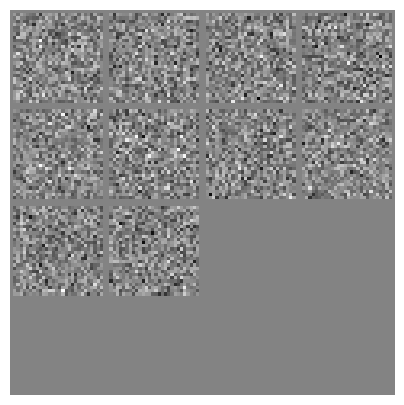

In [83]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
# defines a function that converts raw scores or logits into probabilities

In [84]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
# defines a function that computes the cross-entropy loss between the predicted 'outputs' and the actual 'labels'

In [85]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
# defines a function that returns the accuracy of the model's predictions

In [86]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
# defines a function that gets batches of data from either training or testing datasets based on the mode specified.

In [87]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
# defines a function that performs a matrix multiplication between 'x' and the first element of 'w'

In [88]:
def model(x,w):

    return x@w[0]

In [ ]:
# defines a function that performs a single step of gradient descent on a parameter 'w'

In [89]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()

In [ ]:
# defines a function that generates and logs accuracy metrics for a machine learning model's training and testing performance.

In [90]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
# defines a function that generates samples from a truncated normal distribution

In [91]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
# initializes a project in the "wandb" platform and runs a loop for three times.
# Each time, it sets some configurations for the project, and initializes a neural network weight matrix
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

# trains a neural network model and generates plots to monitor its training progress
    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
# defines a function that gets batches of training or testing data

In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
# reshapes the input arrays

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
import torchvision
from torch.nn.functional import *

In [ ]:
# normalize the tensors, bringing their values into a range that's centered around 0.5 with a spread controlled by the standard deviation of 0.5

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
# defines a function that encodes the data

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
# defines a function that decodes the data

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
# takes an input, encodes it using an encoder function, then decodes it using a decoder function

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
# initializing some variables

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
# importing more libraries

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
# defines a function that generates truncated normal random numbers

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0: print(loss.item())

In [ ]:
# retrieves a batch of images and labels from the 'test' dataset and assigns them to 'image_batch' and 'y,' respectively

In [ ]:
image_batch,y = get_batch('test')

In [ ]:
# passing a batch of images through an autoencoder model and storing the reconstructed images

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
# calculates the mean squared error (MSE) between two batches of images.

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
#  selecting the first 25 images from a batch, converting them to NumPy arrays, and then creating a montage plot of these images

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

In [ ]:
# takes the first 25 reconstructed images, selects the first channel of each image, converts them to NumPy arrays, and then plots them in a montage

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



In [ ]:
# initializing variables

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

In [ ]:
# prepares image data from 'train_set' and 'test_set' ensuring they are in the correct format and are normalized

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
# utilizing NumPy to filter arrays

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
# checking the dimensions of the data arrays

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

In [ ]:
###################################################

In [ ]:
# preparing data for GPU-accelerated computation

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
# assigns the values returned by the function to the variables 'x' and 'y'

In [ ]:
x,y = get_batch('train')

In [ ]:
# checks the dimensions of 'x'

In [ ]:
x.shape

In [ ]:
# taking the first 25 images from a batch,
# extracting their first channel, converting them to NumPy arrays, and then creating a montage plot of these images

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
# forward pass of a discriminator in a CNN, which takes an input tensor 'x'
# and a list of weight tensors 'w', processes the input through convolutional and fully connected layers with ReLU activations,
# and outputs a single probability value indicating the likelihood that the input is real or fake

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
# applies transformations to the input 'x' using the given weights 'w', transforming it into a generated output

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 1024

In [ ]:
batch_size = b

In [ ]:
batch_size

In [ ]:
# sets up the necessary components for training a GAN in a PyTorch environment,
# specifically for discriminator and generator optimization and label handling, while also ensuring compatibility with GPU acceleration

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

In [ ]:
# setting up the training loop by defining the number of epochs, batches, and steps

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
# creates two tensors filled with random numbers and places them on the GPU if available

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
# trains the GAN on the provided dataset

In [ ]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
# checks the dimensions of the array

In [ ]:
z1[np.random.randint(steps)].shape

In [ ]:
# generates a tensor of random numbers which has
# been reshaped to have dimensions of 1 row and 64 columns. This tensor is then passed to a function or variable

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
# sets the product of a function equal to a variable

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

In [ ]:
# plots the value of the element located at the first row and first column of the 'output' array.

In [ ]:
plot(output[0,0])